In [59]:
import matplotlib.pyplot as plt
import HW1

%matplotlib inline



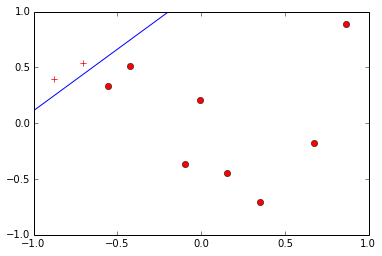

In [95]:
    num_iterations = 0
    num_training_points = 10
    num_misclassified_points = 0

    # create the target function
    f = (np.random.rand(2, 2) - 0.5) * 2
    # f = np.array([[0,0], [1,1]])

    # a = slope, b = -1, c = -(y-intercept)
    a = (f[0][1] - f[1][1]) / (f[0][0] - f[1][0])
    b = -1
    c = f[0][1] - (a * f[0][0])

    # for every iteration of the PLA, determine whether or not the points have been classified correctly or not.
    # we will say every point to the right of f is classified as '+', and every point to the left of f is classified as '-'

    # initialize weights to be 0
    w = np.array([[0, 0, 0]])
    misclassified_points = np.array([[]])
    training_points = (np.random.rand(num_training_points, 2) - 0.5) * 2
    plt.plot(training_points[:,0], training_points[:,1], 'r+')
    x = np.arange(-2, 2, 0.2)
    plt.plot(x, a * x + c)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for num in xrange(num_training_points):
        if (training_points[num][1] > a * training_points[num][0] + c):
          plt.plot(training_points[num][0], training_points[num][1], 'r+')
        else:
          plt.plot(training_points[num][0], training_points[num][1], 'ro')
    plt.show()

In [96]:
    print(training_points)

[[-0.42368389  0.51478771]
 [-0.70733729  0.5395073 ]
 [-0.09391194 -0.36308199]
 [ 0.15548783 -0.4495895 ]
 [-0.00797289  0.20530958]
 [ 0.67211993 -0.17361316]
 [-0.88121743  0.39629898]
 [ 0.3526098  -0.70833059]
 [ 0.86522817  0.89069969]
 [-0.55591186  0.33083231]]


In [97]:
print a, b, c

1.09948695877 -1 1.21277798638


In [94]:
num_iterations = 0
misclassified_points_index = []
w = np.array([[0, 0, 0]])
while num_iterations < 50:
    num_iterations += 1
    print("======ITERATION # ", num_iterations)

    for num in xrange(num_training_points):
        # see if point is +/- based off of its relation to f
        true_class = 1 if (training_points[num][1] > a * training_points[num][0] + c) else -1

        # determine perceptron output 
        perceptron_class = int(np.sign(1 * w[0][0] + training_points[num][0] * w[0][1] + training_points[num][1] * w[0][2]))

      # see how our hypothesis classifies it based off of w
        if perceptron_class != true_class:
            # print("==========")
            # print("MISCLASSIFIED")
            # print("perceptron_class ", perceptron_class)
            # print("w ", w)
            # print("true class ", true_class)
            # print("current point ", training_points[num,:])
            misclassified_points_index.append(num)
            num_misclassified_points += 1

        print("==========")
        if num_misclassified_points > 0:
          # pick a random misclassified point and update w. Then reset num_misclassified_points
            rand_index = random.randint(0, len(misclassified_points_index) - 1)
            # true_class = 1 if ((a * training_points[rand_index][0]) + (b * training_points[rand_index][1]) > c) else -1
            true_class = 1 if (training_points[rand_index][1] > a * training_points[rand_index][0] + c) else -1
            print("NUM MISCLASS POINTS ", num_misclassified_points)
            print("CHOSEN CLASS ", true_class)
            print("CHOSEN POINT to update w ", training_points[rand_index,:])
            x_hat = np.array([1])
            x_hat = np.append(x_hat, training_points[rand_index,:])
            w = w + true_class * x_hat
            w = w / (np.linalg.norm(w)) # normalize w to prevent it from blowing up

            num_misclassified_points = 0
            misclassified_points_index = []
            print("UPDATED w", w)
        else:
            print("CONVERGED at ", num_iterations)
            print(w)
            break

('======ITERATION # ', 1)
('NUM MISCLASS POINTS ', 1)
('CHOSEN CLASS ', 1)
('CHOSEN POINT to update w ', array([ 0.3284178, -0.5285935]))
('UPDATED w', array([[ 0.8490233 ,  0.27883436, -0.44878819]]))
('CONVERGED at ', 1)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 2)
('CONVERGED at ', 2)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 3)
('CONVERGED at ', 3)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 4)
('CONVERGED at ', 4)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 5)
('CONVERGED at ', 5)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 6)
('CONVERGED at ', 6)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 7)
('CONVERGED at ', 7)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 8)
('CONVERGED at ', 8)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 9)
('CONVERGED at ', 9)
[[ 0.8490233   0.27883436 -0.44878819]]
('======ITERATION # ', 10)
('CONVERGED at

## 